In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [7]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def comprehensive_preprocessing(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Menghapus karakter khusus dan angka
    text = re.sub(r'\W|[\d_]', ' ', text)

    # Menghapus kata yang berulang
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # Menghapus emoji atau simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+"
    )
    text = emoji_pattern.sub(r'', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s#]', ' ', text)

    # Menghapus kata-kata singkat
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Mengonversi teks ke huruf kecil
    text = text.lower()

    # Menghapus spasi berlebih
    text = ' '.join(text.split())

    # Buat stemmer
    # factory = StemmerFactory()
    # stemmer = factory.create_stemmer()

    # Buat stopword remover
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()

    text = stopword_remover.remove(text)

    # # Stemming
    # text = stemmer.stem(text)

    return text

In [15]:
df = pd.read_csv('data/dataset_jurnal_indo_5k.csv')

df['data'] = df['title'] + df['abstrac_clean']
df.head(500)

,jid,aid,date,title,desc,abstrac_clean,data
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang “penyimpanan mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...
...,...,...,...,...,...,...,...
495,1000,oai:ojs.ejournal.unsrat.ac.id:article/41029,2022-07-30,Oral Manifestation of Sexual Transmitted Diseases,Abstract: Sexually transmitted diseases (STDs)...,: penyakit menular seksual (pms) merupakan inf...,Oral Manifestation of Sexual Transmitted Disea...
496,1000,oai:ojs.ejournal.unsrat.ac.id:article/41044,2022-07-30,Behavioral Changes in Cleansing Complete Dentu...,Abstract: Tooth loss experienced by elderly ca...,: kehilangan gigi yang dialami oleh lanjut usi...,Behavioral Changes in Cleansing Complete Dentu...
497,1000,oai:ojs.ejournal.unsrat.ac.id:article/41102,2022-07-27,Management of Exfoliative Cheilitis,Abstract: Cheilitis is an inflammation of the ...,: keilitis adalah adanya inflamasi pada vermil...,Management of Exfoliative Cheilitis: keilitis ...
498,1000,oai:ojs.ejournal.unsrat.ac.id:article/41279,2022-08-25,Management of Primary Tooth in Agenesis of Lat...,Abstract: Agenesis is commonly found in maxill...,: umumnya agenesis dijumpai pada gigi insisivu...,Management of Primary Tooth in Agenesis of Lat...


In [8]:
data = df['data'].astype(str).apply(comprehensive_preprocessing)
data

0       efektivitas perlakuan ozon mutu kangkung khas ...
1       penyimpanan mangga modifikasi atmosfir penggun...
2       pengaruh rasio susu full cream jagung manis ze...
3       kajian mutu daya simpan keju mozzarella probio...
4       pengaruh penambahan probiotik lactobacillus ca...
                              ...                        
4995    efek pemberian depo medroxy progesteron acetat...
4996    faktor berhubungan stigma masyarakat perawat c...
4997    faktor faktor mempengaruhi kepatuhan pengobata...
4998    kurma alternatif meningkatkan kadar hemoglobin...
4999    faktor penyebab ketidaklengkapan pengisian dok...
Name: data, Length: 5000, dtype: object

In [9]:
df['data_clean'] = data
# df.to_csv('dataset_clean_5k.csv')
df

,jid,aid,date,title,desc,abstrac_clean,data,data_clean
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,Penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,efektivitas perlakuan ozon mutu kangkung khas ...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,Penelitian tentang “Penyimpanan Mangga secara...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,penyimpanan mangga modifikasi atmosfir penggun...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,Penelitian ini bertujuan untuk mengetahui peng...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,pengaruh rasio susu full cream jagung manis ze...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,Penelitian ini bertujuan untuk mengetahui kons...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,kajian mutu daya simpan keju mozzarella probio...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,Keju Mozarella salah satu keju khas Italia yan...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,pengaruh penambahan probiotik lactobacillus ca...
...,...,...,...,...,...,...,...,...
4995,10480,oai:ojs.forikes-ejournal.com:article/623,2019-12-23,Efek Pemberian Depo Medroxy Progesteron Acetat...,Long term DMPA usage causes impaired estrogen ...,Penggunaan DMPA jangka panjang menghambat perl...,Efek Pemberian Depo Medroxy Progesteron Acetat...,efek pemberian depo medroxy progesteron acetat...
4996,10480,oai:ojs.forikes-ejournal.com:article/1727,2021-11-30,Faktor yang Berhubungan dengan Stigma Masyarak...,Stigma and discrimination as well as changes i...,Stigma and discrimination as well as changes i...,Faktor yang Berhubungan dengan Stigma Masyarak...,faktor berhubungan stigma masyarakat perawat c...
4997,10480,oai:ojs.forikes-ejournal.com:article/901,2020-07-28,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,Background: The biggest problem of transmissio...,Latar belakang: Masalah terbesar penularan pen...,Faktor-faktor yang Mempengaruhi Kepatuhan Peng...,faktor faktor mempengaruhi kepatuhan pengobata...
4998,10480,oai:ojs.forikes-ejournal.com:article/1460,2021-07-14,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,Anemia is the main cause of the high maternal ...,Anemia adalah penyebab utama angka kematian ib...,Kurma Sebagai Alternatif untuk Meningkatkan Ka...,kurma alternatif meningkatkan kadar hemoglobin...


In [10]:
# Menerapkan vektorisasi TF-IDF pada deskripsi jurnal
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

In [11]:
# Menentukan jumlah cluster yang diinginkan
jumlah_cluster = 2

# Menerapkan algoritma K-Means
kmeans = KMeans(n_clusters=jumlah_cluster)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=2)

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


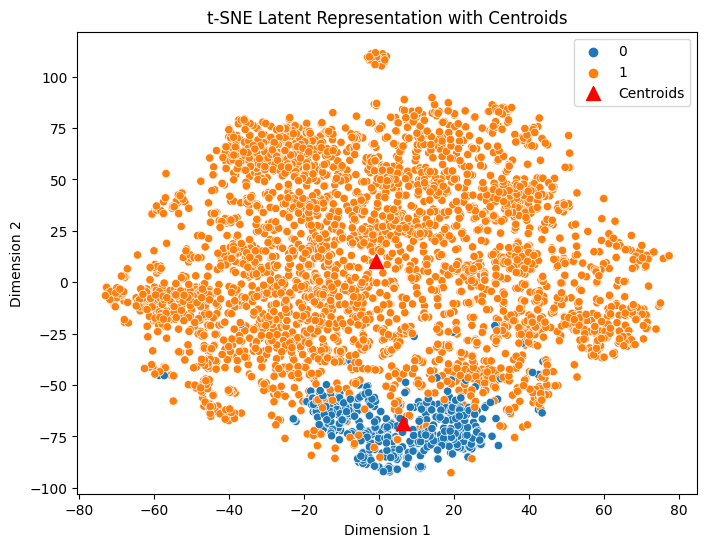

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

def plot_vector_distribution(tfidf_matrix, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=100, label='Centroids')
    
    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(tfidf_matrix, kmeans.labels_)


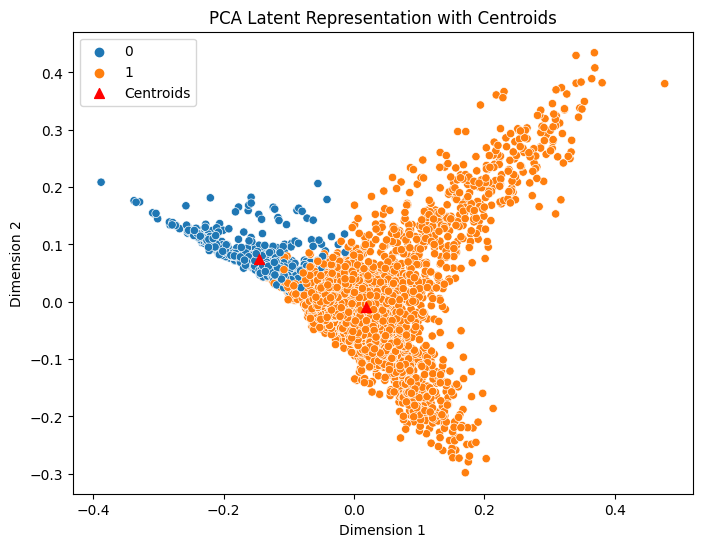

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation.toarray())

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(tfidf_matrix, kmeans.labels_)